In [1]:
# imports
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 
import random
import numpy as np
import mltools as ml

In [2]:
#1 Read the advertising data set (3 attributes, one response variable) 
# into table using a pandas data frame.
advertising = pd.read_csv('advertising.csv')
advertising.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
#2  
# Add two columns to your table: 
# TVstd: x’ = (x - μ) / s, where μ is the mean and s is the standard deviation.
# TVnorm: x’ = (x – xmin) / (xmax – xmin)


# add standardization column 
TV_mean = advertising['TV'].mean()
TV_standard_dev = advertising['TV'].std()

advertising['TV_std'] = (np.subtract(advertising['TV'], TV_mean))/(TV_standard_dev)

# add normalization column 
TV_min = advertising['TV'].min()
TV_max = advertising['TV'].max()

advertising['TV_norm'] = (np.subtract(advertising['TV'], TV_min)) / (np.subtract(TV_max, TV_min))


In [4]:
advertising.head(10)

,Unnamed: 0,TV,radio,newspaper,sales,TV_std,TV_norm
0,1,230.1,37.8,69.2,22.1,0.967425,0.775786
1,2,44.5,39.3,45.1,10.4,-1.194379,0.148123
2,3,17.2,45.9,69.3,9.3,-1.512360,0.055800
3,4,151.5,41.3,58.5,18.5,0.051919,0.509976
4,5,180.8,10.8,58.4,12.9,0.393196,0.609063
5,6,8.7,48.9,75.0,7.2,-1.611365,0.027054
6,7,57.5,32.8,23.5,11.8,-1.042960,0.192087
7,8,120.2,19.6,11.6,13.2,-0.312652,0.404126
8,9,8.6,2.1,1.0,4.8,-1.612530,0.026716
9,10,199.8,2.6,21.2,10.6,0.614501,0.673318


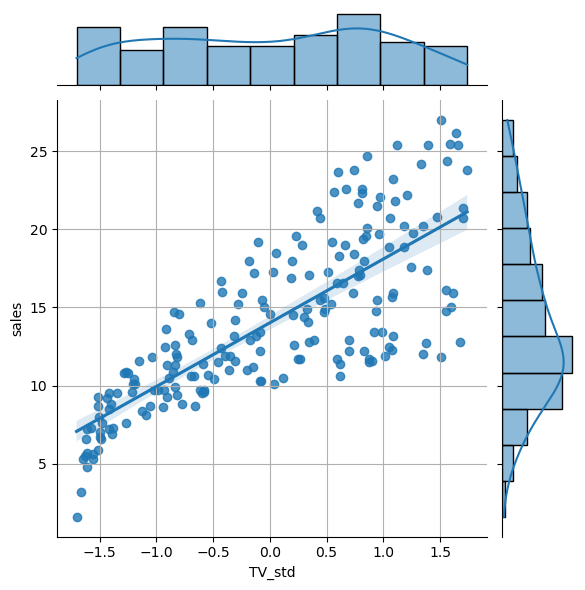

In [5]:
# 3 
# Use the seaborn library to produce a joint plot of sales (y axis) vs. TVstd advertising (x- axis). 
# Specifying the parameter kind=’reg’ will produce a linear regression line. 
# The shaded area around the line represents a 95% confidence interval.

# seaborn joint plot
sns.jointplot(data = advertising, x='TV_std', y='sales',  kind='reg')
plt.grid()

In [6]:
# 4 Implement functions for MSE (Mean Squared Error) and MAE (Mean Absolute Error). 
# Both functions should accept two parameters (actual response values and model predictions as either a data series or a vector).

import numpy as np


def MSE(response_values, model_predictions):
    mse = np.mean(((np.subtract(response_values, model_predictions)) ** 2))
    return mse


def MAE(response_values, model_predictions):
    mae = np.mean(np.abs(np.subtract(response_values, model_predictions)))
    return mae
    

In [7]:
# 5 
# Suppose that our predicted response is: ypred = b0 + b1 x. 
# Create two surface plots depicting MSE as a function of b0 and b1. 
# One plot should use x-values taken from TVstd, the other from TVnorm. 
# Allow both b0 and b1 to range from -200 to +200 in steps of 5. 

# calculate MSE function for plots
def MSE_calc(b, m, x):
    b0_errors = []
    for b0 in b:
        b1_errors = []
        for b1 in m:
            x_errors = []
            for spend in x:
                x_errors.append(b0 + (b1*spend))
            error = MSE(x_errors, x)
            b1_errors.append(error)
        b0_errors.append(b1_errors)
    return np.array(b0_errors)

# calculate MAE function for plots
def MAE_calc(b, m, x):
    b0_errors = []
    for b0 in b:
        b1_errors = []
        for b1 in m:
            x_errors = []
            for spend in x:
                x_errors.append(b0 + (b1*spend))
            error = MAE(x_errors, x)
            b1_errors.append(error)
        b0_errors.append(b1_errors)
    return np.array(b0_errors)

# set surface plots
b0 = np.arange(-200, 200, 5)
b1 = np.arange(-200, 200, 5)
x, y = np.meshgrid(b0, b1)


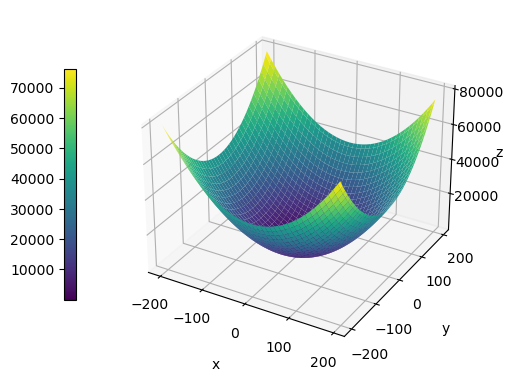

In [8]:
# PLOT 1 - MSE, x values from TVstd
z1 = MSE_calc(b0, b1, advertising['TV_std'])
ml.surface_plot(x,y,z1)

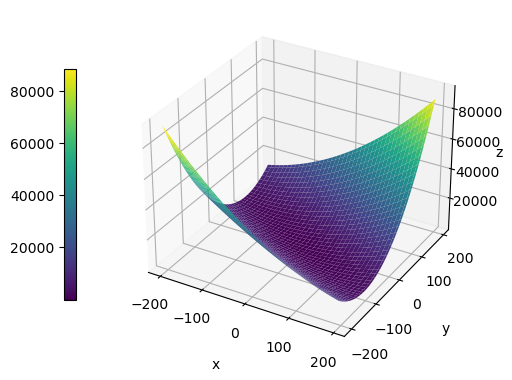

In [9]:
# PLOT 2 - MSE, x-values from TVnorm 
z1 = MSE_calc(b0, b1, advertising['TV_norm'])
ml.surface_plot(x,y,z1)

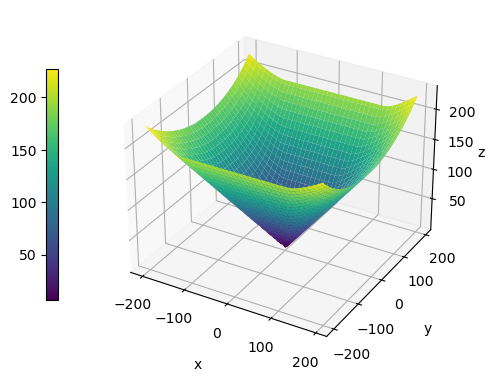

In [10]:
# PLOT 3 - MAE, x-vaues from TVstd
z1 = MAE_calc(b0, b1, advertising['TV_std'])
ml.surface_plot(x,y,z1)

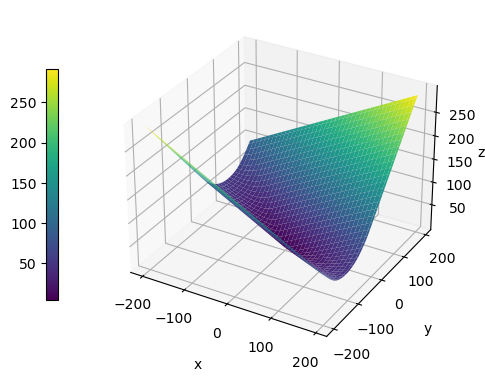

In [11]:
# PLOT 4 - MAE, x-values from TVnorm 
z1 = MAE_calc(b0, b1, advertising['TV_norm'])
ml.surface_plot(x,y,z1)


In [12]:
# 6. 
# Implement a “random step” search algorithm (as a function) to find the best-fit linear model for X = TVstd, y = sales. 
# Here is how the random step algorithm works: Start your search at a random value for b0 and b1 in the range [-200...+200].
# Measure the current MSE. Now randomly adjust values for both coefficients by some random amount [-1...+1] and recompute the error. 
# If the MSE is reduced, keep the new values for b0 and b1. Otherwise revert to the original values. 
# Halt the algorithm when no improvements to MSE can be found after k = 1000 random updates. 
# Report your final b0 and b1. 
import random as rnd

# x = tv_std
tv_std = advertising["TV_std"].tolist()

# y = sales
sales = advertising["sales"].tolist()

# randomly adjust values for both coefficients by some random amount [-1...+1]
#random_adjust = np.arange(-1, 1, .01)

#“random step” search algorithm
def random_search(b0, b1, x, y):
    
    b0_start = rnd.uniform(-200, 200) 
    b1_start = rnd.uniform(-200,200) 
    b0_list_randstep = []
    b1_list_randstep = []
    
    # measure the current MSE
    y_pred = [] 
    for val in x: 
        y_pred.append(b0_start + b0_start * val)
    
    mse_start = MSE(y, y_pred)
    
    # randomly adjust values for both coefficients by some random amount and recompute MSE
    # Halt the algorithm when no improvements to MSE can be found after k = 1000 random updates.
    b0_best = b0_start
    b1_best = b1_start
    step_counter = 0
    while step_counter < 1000:
        
        b0_new = b0_start + rnd.uniform(-1,1)
        b1_new = b1_start + rnd.uniform(-1,1)
        
        step_counter += 1
        
        # measure new MSE
        y_pred1 = [] 
        for val in x: 
            y_pred1.append(b0_new + b1_new * val)
            
        mse_new = MSE(y, y_pred1)

        # If the MSE is reduced, keep the new values for b0 and b1. Otherwise revert to the original values. 
        if (mse_new < mse_start):
            b0_start = b0_new
            b1_start = b1_new 
            b0_list_randstep.append(b0_start)
            b1_list_randstep.append(b1_start) 
            mse_start = mse_new 

            
    return b0_start, b1_start, b0_list_randstep, b1_list_randstep


In [13]:
# test random step seach algorithm 
random_search_results = random_search(b0,b1,tv_std,sales)

b0_final = random_search_results[0]
b1_final = random_search_results[1]

b0_vals_random_step = random_search_results[2]
b1_vals_random_step = random_search_results[3]


print("b0=",b0_final)
print("b1=", b1_final)

#ignore these lists, printing them for sanity check
print(b0_vals_random_step,b1_vals_random_step)


b0= 14.125902015138555
b1= 4.154462674754151
[-168.65494864245366, -168.35937931519783, -167.9735758644796, -167.2587276248721, -167.00862089134125, -166.6196876183269, -166.4925843075241, -165.743643175579, -164.97973437109184, -164.87031163445667, -163.9892699469731, -163.1707287460509, -162.4118855279324, -161.6922760160491, -162.19321467937363, -161.5418399290197, -160.74948493797285, -160.148866307404, -159.43383148583777, -159.3846096136429, -158.66691699247687, -158.36530187519043, -158.53692014986768, -158.65895472620664, -157.7532562456838, -156.86087815357402, -156.57885928367986, -155.6507090904378, -155.58329836209867, -155.20197868353208, -155.81869141589502, -155.58689086367988, -155.25817455715938, -154.5361014273454, -153.7665216848481, -154.06832312543503, -153.55271814460048, -153.15320420779753, -152.6713774296831, -152.41414764444875, -151.48330153849585, -151.90712557485466, -151.90998747770678, -151.0142632256178, -150.1123396365369, -149.59458014191426, -149.5282

### Are your results consistent with your Seaborn joint plot from step 3?
Yes my results are consistent with my Seaborn joint plot from step 3 because at TV_std = 0 is about 14 on the sales scale and the slope of the line seems to be about 4. 

In [14]:
# 7. Modify your random step algorithm to instead implement gradient descent. 
# Recompute and report your optimal best fit coefficients.

b0 = np.arange(-200, 200, 1)
b1 = np.arange(-200, 200, 1)

# calculate slope for b1
def slope_calc_b1(y, y_pred, x):
    return np.sum(np.subtract(y_pred, y) * x)

#check
trial = []
trial.append(b0[200] +(b1[200]*advertising['TV_std']))
slope_calc_b1(advertising.sales.tolist(), trial, advertising.TV_std.tolist())

-812.1631703093049

In [15]:
# calculate slope for b0
def slope_calc_b0(y, y_pred):
    return np.sum(np.subtract(y_pred, y))

#check
trial = []
trial.append(b0[200] +(b1[200]*advertising['TV_std']))
slope_calc_b0(advertising.sales.tolist(), trial)

-2804.5

In [16]:
b0 = np.arange(-200, 200, 1)
b1 = np.arange(-200, 200, 1)

# Random step algorithm with gradient descent
def random_search_gradient(b0, b1, x, y):
    alpha = 0.001
    
    i = random.randint(0,399)
    j = random.randint(0,399)
    
    b0_list_gradient = []
    b1_list_gradient = []
    
    b0_start = b0[i]
    b1_start = b1[j]
        
    # measure the current MSE
    y_pred = [] 
    for val in x: 
        y_pred.append(b0_start + b1_start * val)
        
    start_slope_b0 = slope_calc_b0(y, y_pred)
    start_slope_b1 = slope_calc_b1(y, y_pred, x)
    mse_start = MSE(y, y_pred)
    mse_new = mse_start - alpha
    b0_best = 0
    b1_best = 0
    
    while(mse_new <= mse_start):
        b0_start -= start_slope_b0 * alpha
        b1_start -= start_slope_b1 * alpha     
        y_pred = []
        for val in x:
            y_pred.append(b0_start + b1_start * val)
        new_slope_b0 = slope_calc_b0(y, y_pred)
        new_slope_b1 = slope_calc_b1(y, y_pred, x)
        mse_new = MSE(y, y_pred)

        if mse_new <= mse_start:
            start_slope_b0 = new_slope_b0
            start_slope_b1 = new_slope_b1
            b0_best = b0_start
            b1_best = b1_start
            b0_list_gradient.append(b0_best)
            b1_list_gradient.append(b1_best)
            mse_start = mse_new
        else:
            b0_start = b0_best
            b1_start = b1_best
    return b0_best, b1_best, b0_list_gradient, b1_list_gradient
            

In [17]:
# recompute and report optimal best fit coefficients
gradient_results = random_search_gradient(b0, b1, tv_std, sales)

b0_final_gradient = gradient_results[0]
b1_final_gradient = gradient_results[1]

b0_vals_gradient = gradient_results[2]
b1_vals_gradient = gradient_results[3]

print("b0=", b0_final_gradient)
print("b0=",b1_final_gradient)


#ignore these lists, printed for sanity check
print(b0_vals_gradient,b1_vals_gradient)

b0= 14.02249999282254
b0= 4.081221976927659
[-54.795500000000004, -41.03190000000001, -30.021020000000007, -21.21231600000001, -14.165352800000008, -8.527782240000008, -4.017725792000008, -0.4096806336000074, 2.4767554931199927, 4.785904394495994, 6.633223515596795, 8.111078812477436, 9.293363049981949, 10.239190439985558, 10.995852351988447, 11.601181881590756, 12.085445505272604, 12.472856404218083, 12.782785123374467, 13.030728098699573, 13.229082478959658, 13.387765983167727, 13.514712786534181, 13.616270229227345, 13.697516183381875, 13.7625129467055, 13.8145103573644, 13.85610828589152, 13.889386628713215, 13.916009302970572, 13.937307442376458, 13.954345953901166, 13.967976763120932, 13.978881410496745, 13.987605128397396, 13.994584102717917, 14.000167282174333, 14.004633825739466, 14.008207060591573, 14.011065648473258, 14.013352518778605, 14.015182015022884, 14.016645612018307, 14.017816489614646, 14.018753191691717, 14.019502553353373, 14.020102042682698, 14.020581634146158, 

In [18]:
# 8. 
# Determine a linear best-fit using the scikit-learn linear regression model. 
# The values obtained from your two algorithms should be very close to the scikit-learn result!

from sklearn import linear_model as lm

regr = lm.LinearRegression()
regr.fit(advertising[["TV_std"]], advertising["sales"])
y_intercept = regr.intercept_
coef = regr.coef_
print("Y-intercept: ", y_intercept)
print("Slope: ", coef)


Y-intercept:  14.0225
Slope:  [4.08122196]


The values obtained from my two above algorithms are very close to the skikit learn result here. 

In [19]:
# 9. 
# Plot the progress of your two algorithms on a single contour plot of the MSE error function.
#random_search_gradient
#random_search

# The 'single contour plot of the MSE error' refers to just a contour plot that visualizes the output 
# of the MSE for different values of b0 and b1. For this, you need to compute the output of the MSE 
# for each pair of b0, b1 and use these outputs as the Z for the contour plot. 


# Note that this does not yet involve any other algorithm such as gradient descent or random stepping.

In [20]:
# var1,var2,var3,var4 = random_search(b0,b1,tv_std, sales)

#b0_vals_random_step = var3
#b1_vals_random_step = var4
#b0_vals_random_step = random_search(b0,b1,tv_std,sales)[2]
#b1_vals_random_step = random_search(b0,b1,tv_std,sales)[3]

#b0_vals_gradient = random_search_gradient(b0, b1, tv_std, sales)[2]
#b1_vals_gradient = random_search_gradient(b0, b1, tv_std, sales)[3]

In [21]:
#print(b0_vals_random_step)
#print(b1_vals_random_step)

In [24]:
def contour_plot(x, y, f, dfdx, dfdy, gradient_field = True, ascend = None, alpha=0.01):
    
    b0 = np.arange(-200, 200,5)
    b1 = np.arange(-200, 200,5)
    
    X, Y = np.meshgrid(b0,b1)
    
    prediction = advertising["TV_std"]
    actual = advertising['sales']
    
    tv_std = list(prediction)
    act_sales = np.array(actual)
    
    Z = MSE_calc(b0, b1, prediction)
    
    
    plt.figure(figsize=(8, 8))
    cp = plt.contour(X,Y,Z, 50)
    
    
# store the b0, b1 from gradient descent algorithm and random step algoritms 
# 2 different lists of b0, 2 lists of b1, 2 from gradient descnet and 2 from random step algorithsm 
    plt.plot(b0_vals_random_step,b1_vals_random_step, color = "blue")
    plt.plot(b0_vals_gradient,b1_vals_gradient, color = "red")
    

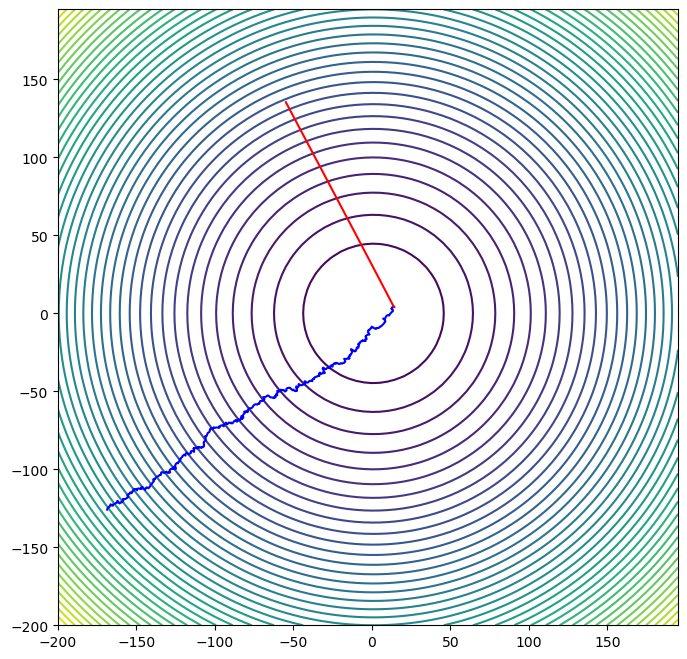

In [25]:
b0 = np.arange(-200, 200, 5)
b1 = np.arange(-200, 200, 5)
contour_plot(b0, b1, MSE_calc, slope_calc_b0, slope_calc_b1, advertising["TV_std"], advertising["sales"])

